#**Link do meu arquivo no Colab - Público:**
https://colab.research.google.com/drive/1KX8ON4qKyyGVztjzreTYI209b2squSYM#scrollTo=JCJkpNlwnukn

#**P1 de Aprendizado de Máquina**

A avaliação será COM consulta, sendo permitido:
* consultar o material de aula disponível
* fazer pesquisas no google e acessar sites
* trazer livros ou anotações e consultá-los durante a prova

Entretanto **NÃO** é permitido (será considerado infração):

* usar smart phone ou tablet
* consultar e-mail, whatsapp, discord ou qualquer outra forma de comunicação direta com outras pessoas
* criar perguntas em foruns na hora da prova
* utilizar outras pessoas para resolver a prova por você
* copiar o exercício pronto de algum site
* utilizar ferramentas de auto-complete ou auto-geração de código (como o github copilot e outros LLMs)
* utilizar ferramentas que possuam inteligência Artificial, por exemplo, ChatGPT
* acessar a avaliação enquanto estiver fora da sala ou já tiver informado a entrega ao professor


A base que será usada por nós tem dados saúde pública nos EUA. A variável ALVO será **smoker**.

1) Faça uma análise exploratória.

* A análise exploratória foi feita utilizando as seguintes bibliotecas:

  * pandas as pd
  * numpy as np
  * seaborn as sns
  * matplotlib  

2) Como foi a preparação (pré-processamento da base)? Há dados faltantes? Variáveis categóricas?

* Coluna "Unnamed: 0" e fastfood irrelevantes para a análise e modelo removidas.

* Não foi identificado dados faltantes, foi feita a checagem por valores nulos.

* Correlacionando os valores com o uso do Heatmap, aparentemente os dados/ variáveis categóricas de **"altura", "cintura", "peso" e "IMC"** são importantes para a acurácia do teste e previsão.

* Variáveis categóricas identificadas - bmi, waist, weight, height e diabetes.

* Feito a análise do resumo estatístico da base através da ferramenta ***describe***

3) Este é um problema de Regressão ou Classificação? Explique.

O problema em questão é de **classificação**, uma vez que a variável target é - "smoker".

4) Testem todos os modelos que puder. Qual modelo você escolheu?

* O modelo -> **Regressão Logística**.

5) A base está balanceada? Comente.

* A base de dados está relativamente balanceada, já que a distribuição entre as classes da variável smoker - fumante e não fumante - está bem próxima.

6) Avaliação. Como fez a avaliação? Quais métricas? O modelo foi satisfatório?

* O teste e treino foram aplicados utilizando as seguintes bibliotecas:

	* sklearn.model_selection -> Módulo train_test_split
	* sklearn.linear_model -> Módulo LogisticRegression
	* sklearn.metrics -> Módulo accuracy_score, classification_report

* A separação dos dados foi feita da seguinte forma:

	* 70% para treino
	* 30% para teste

* **Acurácia foi considerada mediana para o modelo atual - 66.94%** - apontando que o modelo deverá ser ajustado para melhores previsões sob os dados/ testes futuros.

###Análise Exploratória

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/cedmenezes/estudos/main/nhanes.csv

df = pd.read_csv('nhanes.csv')

--2024-10-25 14:26:01--  https://raw.githubusercontent.com/cedmenezes/estudos/main/nhanes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58913 (58K) [text/plain]
Saving to: ‘nhanes.csv.10’

nhanes.csv.10       100%[===================>]  57.53K  --.-KB/s    in 0.02s   

2024-10-25 14:26:01 (2.75 MB/s) - ‘nhanes.csv.10’ saved [58913/58913]



In [ ]:
df

,Unnamed: 0,systolic,weight,height,bmi,waist,age,diabetes,smoker,fastfood
0,0,100,98.6,172.0,33.3,120.4,516,0,1,5
1,1,112,96.9,186.0,28.0,107.8,684,0,0,0
2,2,134,108.2,154.4,45.4,120.3,456,0,1,2
3,3,108,84.8,168.9,29.7,109.0,900,0,0,1
4,4,128,97.0,175.3,31.6,111.1,504,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1470,1470,128,106.3,185.0,31.1,113.7,924,1,0,0
1471,1471,112,118.7,169.3,41.4,134.6,420,0,0,1
1472,1472,146,104.0,168.2,36.8,129.1,804,0,1,1
1473,1473,124,92.3,177.3,29.4,100.8,336,0,1,13


In [ ]:
# Checando se há valores nulos na base
df.isnull().sum()

,0
Unnamed: 0,0
systolic,0
weight,0
height,0
bmi,0
waist,0
age,0
diabetes,0
smoker,0
fastfood,0


In [ ]:
# Dropando colunas desnecessárias para a análise - Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
# Dropando colunas desnecessárias para a análise - fastfood
df.drop('fastfood', axis=1, inplace=True)

In [ ]:
# Checando apenas os valores referentes aos fumantes
df.loc[df['smoker'] == 1]

,systolic,weight,height,bmi,waist,age,diabetes,smoker
0,100,98.6,172.0,33.3,120.4,516,0,1
2,134,108.2,154.4,45.4,120.3,456,0,1
4,128,97.0,175.3,31.6,111.1,504,0,1
7,124,53.6,162.4,20.3,74.6,312,0,1
11,124,99.3,177.9,31.4,110.0,624,0,1
...,...,...,...,...,...,...,...,...
1468,110,113.9,173.6,37.8,131.4,828,0,1
1469,104,71.8,153.8,30.4,98.2,492,0,1
1472,146,104.0,168.2,36.8,129.1,804,0,1
1473,124,92.3,177.3,29.4,100.8,336,0,1


In [ ]:
# Checando apenas os valores referentes aos não fumantes
df.loc[df['smoker'] == 0]

,systolic,weight,height,bmi,waist,age,diabetes,smoker
1,112,96.9,186.0,28.0,107.8,684,0,0
3,108,84.8,168.9,29.7,109.0,900,0,0
5,102,102.4,150.5,45.2,130.7,756,1,0
6,126,99.4,157.8,39.9,113.2,696,0,0
8,166,78.6,156.9,31.9,102.8,612,1,0
...,...,...,...,...,...,...,...,...
1464,116,79.3,174.5,26.0,95.3,444,0,0
1465,162,99.0,166.1,35.9,124.1,744,1,0
1467,112,85.5,173.6,28.4,96.4,516,0,0
1470,128,106.3,185.0,31.1,113.7,924,1,0


In [ ]:
# Corrigindo valores da coluna coluna height
def height(x):
    return (x['height'])/100

In [ ]:
df['height'] = df.apply(height, axis=1)

In [ ]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   systolic  1475 non-null   int64  
 1   weight    1475 non-null   float64
 2   height    1475 non-null   float64
 3   bmi       1475 non-null   float64
 4   waist     1475 non-null   float64
 5   age       1475 non-null   int64  
 6   diabetes  1475 non-null   int64  
 7   smoker    1475 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 92.3 KB


In [ ]:
# Vericando informações estátisticas
df.describe()

,systolic,weight,height,bmi,waist,age,diabetes,smoker
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000
mean,124.729492,83.563186,1.701799,28.793966,100.034508,586.641356,0.142373,0.477966
std,17.620588,20.582301,0.093263,6.470551,16.153663,203.703854,0.349551,0.499684
min,80.000000,29.100000,1.412000,13.400000,56.200000,240.000000,0.000000,0.000000
25%,114.000000,69.150000,1.637500,24.100000,88.400000,408.000000,0.000000,0.000000
50%,122.000000,81.000000,1.703000,27.900000,98.900000,588.000000,0.000000,0.000000
75%,134.000000,94.500000,1.768000,32.100000,109.550000,744.000000,0.000000,1.000000
max,224.000000,203.500000,2.004000,62.000000,176.000000,960.000000,1.000000,1.000000


In [ ]:
# Correlacionando valores/ variáveis
df.corr()

,systolic,weight,height,bmi,waist,age,diabetes,smoker
systolic,1.000000,0.100214,0.023010,0.090547,0.168130,0.401709,0.153854,-0.125618
weight,0.100214,1.000000,0.406220,0.891528,0.899288,-0.022172,0.131331,-0.056086
height,0.023010,0.406220,1.000000,-0.038482,0.145447,-0.126570,-0.049255,0.083132
bmi,0.090547,0.891528,-0.038482,1.000000,0.912537,0.033798,0.176302,-0.100203
waist,0.168130,0.899288,0.145447,0.912537,1.000000,0.195088,0.225695,-0.132229
age,0.401709,-0.022172,-0.126570,0.033798,0.195088,1.000000,0.266601,-0.376567
diabetes,0.153854,0.131331,-0.049255,0.176302,0.225695,0.266601,1.000000,-0.102437
smoker,-0.125618,-0.056086,0.083132,-0.100203,-0.132229,-0.376567,-0.102437,1.000000


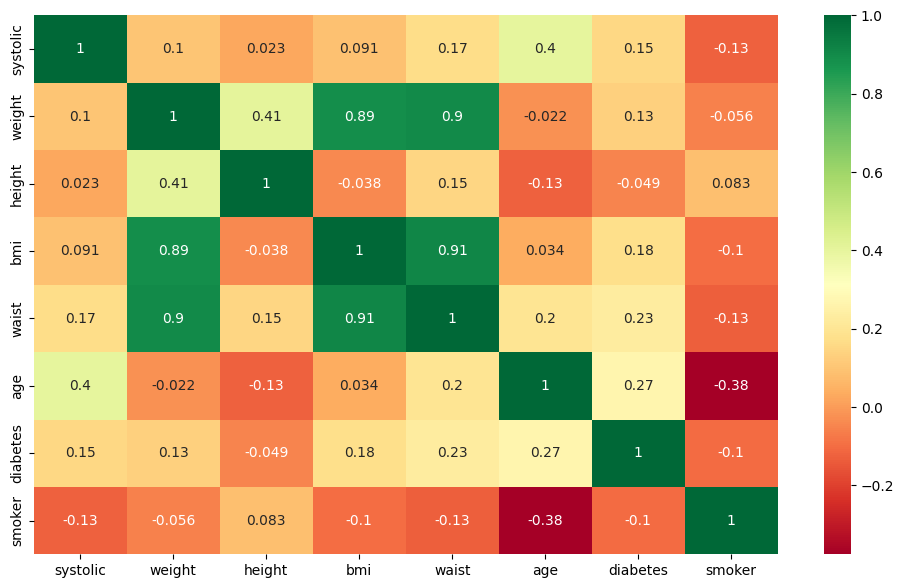

In [ ]:
# Correlacionando valores/ variáveis
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

plt.show()

# Montando Teste/ Treino/ MOdelo

In [ ]:
from sklearn.model_selection import train_test_split
# Separando em treino e teste
# Definindo X - variaveis categóricas a de y/ alvo
X = df.drop(columns=['smoker'])
y = df['smoker'] # -> target

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy*100}\n")

Acurácia do modelo: 66.94045174537987



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
